**HANDS-ON SESSION-II: DATA MINING TOOLS**



**PROFESSOR: IRINA HASHMI**

**CLASSIFICATION MODELS**

IMPORT THE NECESSARY LIBRARIES

In [282]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

IMPORT THE DATA USING PANDAS

In [283]:
income=pd.read_csv('/content/income.csv')
income

,age,workclass,fnlwgt,education,education-num,marital status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


LOOK FOR MISSING VALUES

In [284]:
missing=income.isnull().sum()
missing

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital status,0
occupation,0
relationship,0
race,0
sex,0


DROP THE COLUMNS WHICH ARE REQUIRED FOR ANALYSIS OR FOR LATER PREDICTIONS

In [285]:
income_status=income.drop(columns=['education-num','capital-gain','capital-loss'])
income_status

,age,workclass,fnlwgt,education,marital status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


**DATA ENCODING**: In this step we will be encoding the categorical columns to numeric values by using the 'One Hot Encoding' technique. This step is important because computers and machine learning models can understand and process only numeric values.  



In [286]:
categorical_cols = ['workclass', 'education', 'marital status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
numerical_cols = ['age', 'hours-per-week']

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(income_status[categorical_cols])

# Create a DataFrame from encoded data
encoded_columns = encoder.get_feature_names_out(categorical_cols)
df_encoded = pd.DataFrame(encoded_data, columns=encoded_columns, index=income_status.index)

# Combine numerical data and encoded categorical data
X = pd.concat([income_status[numerical_cols], df_encoded], axis=1)
y = income_status['income']

SPLIT THE DATA TO TRAINING AND TESTING SETS. The training set is 70% of the overall data and the Test set is 30% of the overall data.

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Apply the LOGISTIC REGRESSION MODEL to the training set and then make presictions using the test set.

Logistic regression is a statistical method used to predict binary outcomes (like "yes" or "no") by modeling the relationship between input features and the probability of a specific outcome. It uses a sigmoid function to ensure the output is between 0 and 1, representing the probability of belonging to a particular class.

In [288]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=100, random_state=42)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)
# Predict on the testing set
y_pred = logistic_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Calculate the ACCURACY for the model. The accuracy is 79% which is a good thing which explains that the model is working good

**EVALUATE THE MODEL**: The classification_report function is used to get the four different and important metrics such as precision, recall, f1-score and support.


**Precision**: Measures how many of the positive predictions made by the model are actually correct. It’s about accuracy of positive results.

**Recall**: Measures how many of the actual positive cases the model was able to identify. It’s about finding all the positive cases.

**F1-Score**: A balance between precision and recall, useful when the classes are imbalanced. It’s the harmonic mean of precision and recall.

**Support**: The number of true instances of each class in the test set, showing how many actual cases there were for each class.

In [289]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      7455
        >50K       0.68      0.55      0.60      2314

    accuracy                           0.83      9769
   macro avg       0.77      0.73      0.75      9769
weighted avg       0.82      0.83      0.82      9769

Confusion Matrix:
 [[6850  605]
 [1052 1262]]


In the same way we apply the **DECISION TREE MODEL**. DTC is one of the simple and easy classification mode that can be applied. Train the model and make predictions using the test set.

In [290]:
# Initialize the DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Fit the model on the training data
decision_tree.fit(X_train, y_train)
# Predict on the testing set
y_pred = decision_tree.predict(X_test)

predictions=pd.DataFrame({'Actual':y_test,'Predicted':y_pred1})
predictions

,Actual,Predicted
14160,<=50K,<=50K
27048,<=50K,>50K
28868,>50K,<=50K
5667,<=50K,<=50K
7827,<=50K,<=50K
...,...,...
32476,<=50K,<=50K
21100,<=50K,<=50K
27131,<=50K,<=50K
25526,>50K,<=50K


The same classification report. The accuracy for the logistic regression and the DTC is the same.

In [291]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88      7455
        >50K       0.69      0.35      0.46      2314

    accuracy                           0.81      9769
   macro avg       0.76      0.65      0.67      9769
weighted avg       0.79      0.81      0.78      9769

Confusion Matrix:
 [[7095  360]
 [1511  803]]


Decision tree evaluated above can be plotted. The root node is the pure node which is calculated using different metrics such as **gini index, entropy or information gain**.

Less the entropy, more is the information gain which means the feature is pure and the purest feature is the root node.

The gini index is also a very good metric to measure the impurity of the features. The gini index is calculated for every category of the categorical feature and the category with lowest gini index is taken as a node that undergoes split.

From the plot below the the 'Married-civ-spouse' category of the 'Marital status' feature has low gini index and hence it is taken as the root node.


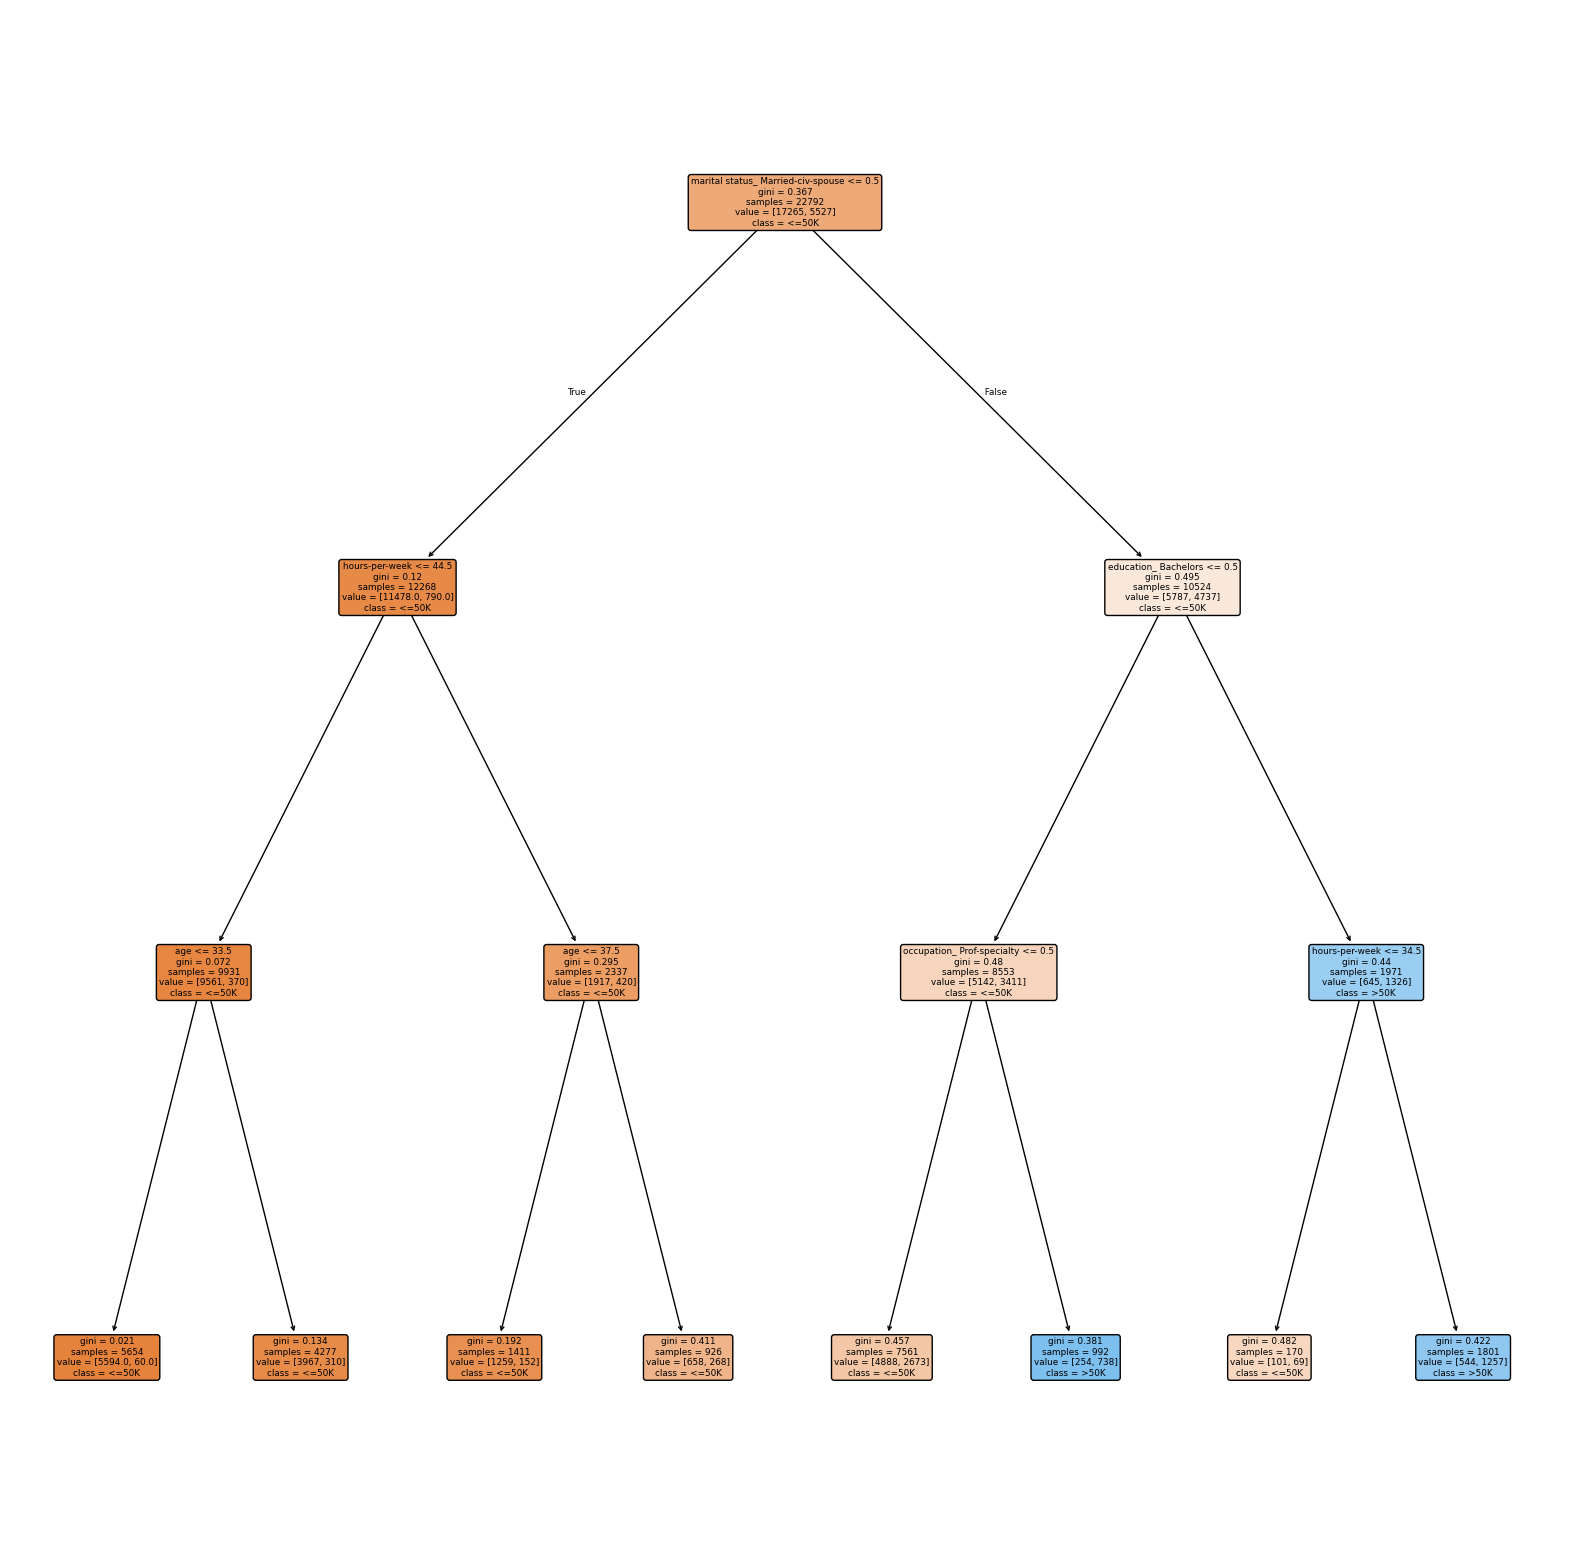

In [292]:
#plot the decision tree
plt.figure(figsize=(20, 20))
tree.plot_tree(decision_tree,
               feature_names=X_train.columns,
               class_names=['<=50K', '>50K'],
               filled=True,
               rounded=True)
plt.show()

The Random forest model is an ensemble of different decision trees. The criterion for evaluating the decion trees nodes is the gini index

In [293]:
#Apply random forest model
random_forest = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=None, random_state=42)
random_forest.fit(X_train, y_train)
#make predictions
y_pred = random_forest.predict(X_test)

Random forest can be used to find ot the important features in the data. According to random forest age is most important criterion to predict the income.

In [294]:
# Get feature importances from the model
feature_importances = random_forest.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
# Sort feature importances
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
0,age,2.820713e-01
1,hours-per-week,1.413975e-01
26,marital status_ Married-civ-spouse,9.409129e-02
28,marital status_ Never-married,3.736145e-02
34,occupation_ Exec-managerial,2.852560e-02
...,...,...
91,native-country_ Thailand,4.782998e-05
32,occupation_ Armed-Forces,1.482977e-05
4,workclass_ Never-worked,6.948700e-06
70,native-country_ Honduras,5.870149e-06


Plot the important features

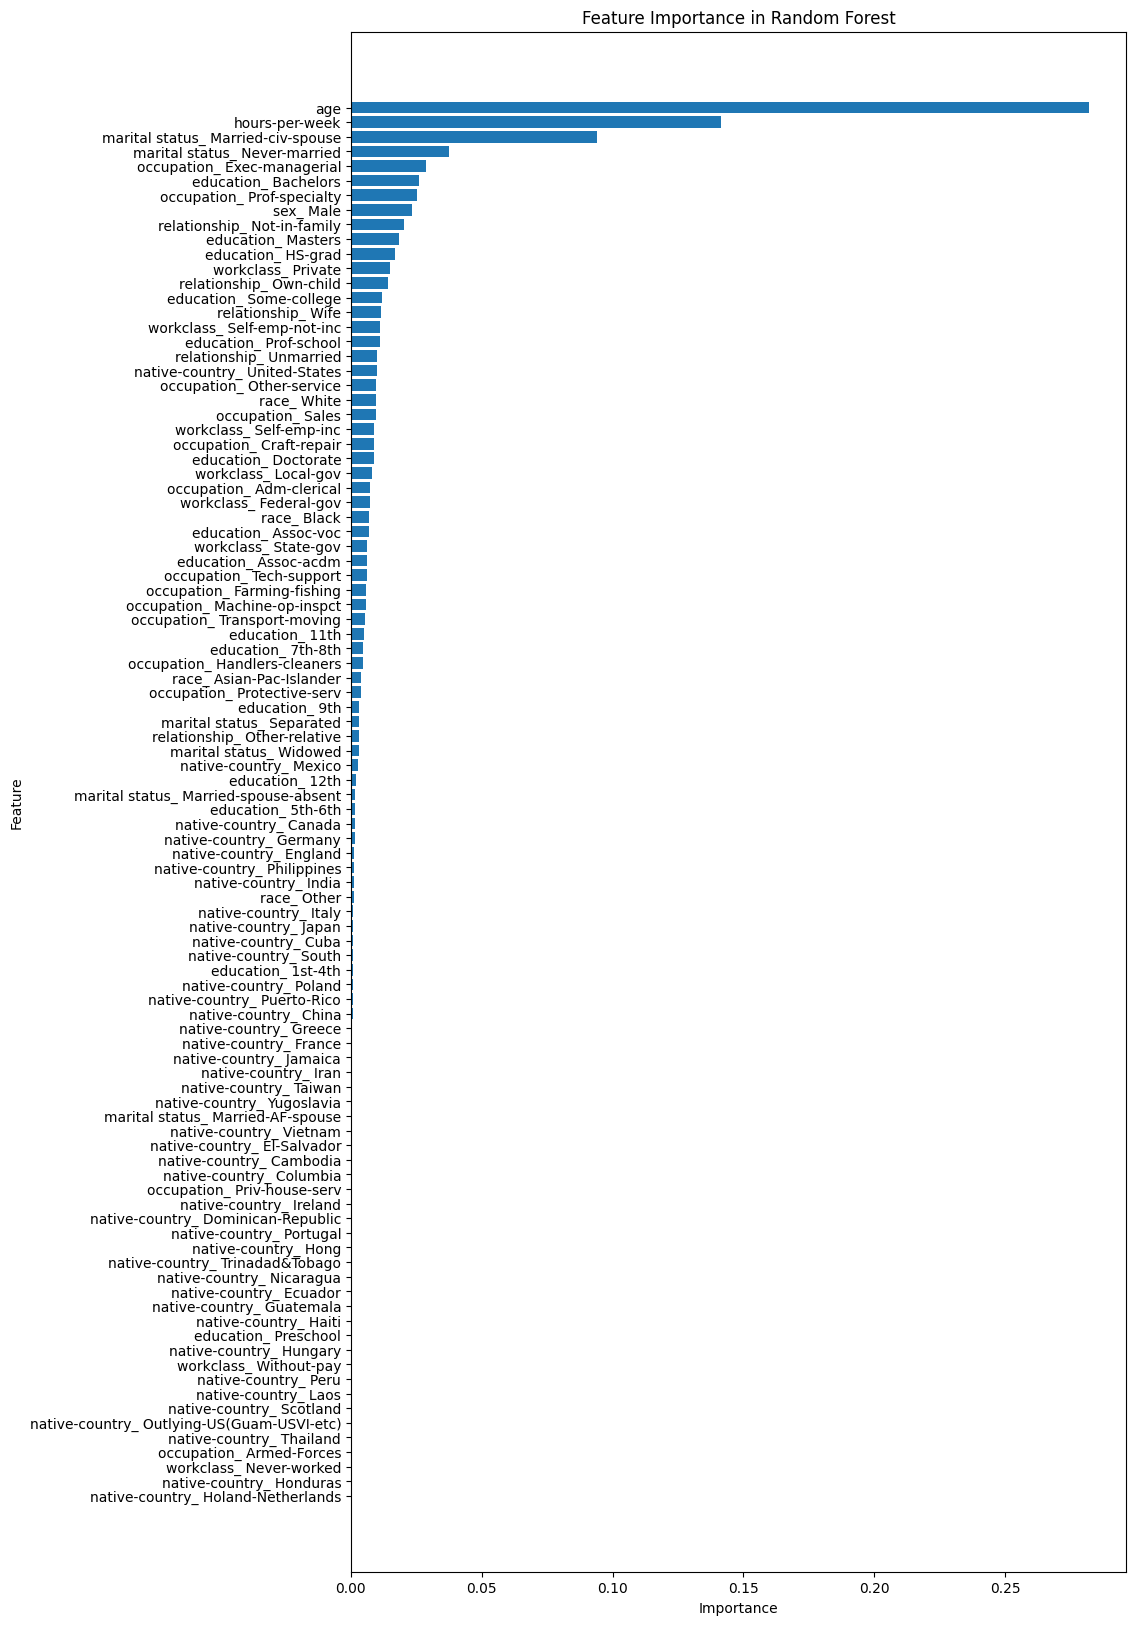

In [295]:
plt.figure(figsize=(10, 20))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

Evaluate the model using the accuracy and other metrics

In [296]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      7455
        >50K       0.63      0.56      0.59      2314

    accuracy                           0.82      9769
   macro avg       0.75      0.73      0.74      9769
weighted avg       0.81      0.82      0.81      9769

Confusion Matrix:
 [[6700  755]
 [1020 1294]]


A **Gradient Boosting Classifier** is a machine learning technique used for classification tasks . It builds a strong model by combining many weak models, typically decision trees.



In [297]:
# Initialize the GradientBoostingClassifier
gbm = GradientBoostingClassifier(
    n_estimators=100,    # Number of boosting stages (trees)
    learning_rate=0.05,   # Step size for updating weights (lower values make learning slower)
    max_depth=5,         # Maximum depth of individual trees
    random_state=42
)

# Fit the model on the training data
gbm.fit(X_train, y_train)
# Predict on the testing set
y_pred = gbm.predict(X_test)

In [298]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      7455
        >50K       0.71      0.54      0.61      2314

    accuracy                           0.84      9769
   macro avg       0.79      0.74      0.76      9769
weighted avg       0.83      0.84      0.83      9769

Confusion Matrix:
 [[6957  498]
 [1067 1247]]


UNSUPERVISED LEARNING WITH KNN:

We first encode the data and scale it as we first need to look at the priniple componants and then apply the componants to the KNN model.

In [299]:
# Define categorical and numerical columns
categorical_cols = ['workclass', 'education', 'marital status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
numerical_cols = ['age', 'hours-per-week']

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(income_status[categorical_cols])

# Create a DataFrame from encoded data
encoded_columns = encoder.get_feature_names_out(categorical_cols)
df_encoded = pd.DataFrame(encoded_data, columns=encoded_columns, index=income_status.index)

# Combine numerical data and encoded categorical data
X = pd.concat([income_status[numerical_cols], df_encoded], axis=1)
y = income_status['income']

# Scale the features for better performance of k-NN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Principal components are new features created from the original data in a way that captures as much variation as possible. They are like condensed versions of the original features that simplify the data, helping to highlight patterns and reduce complexity while keeping most of the important information.

In [300]:
#Apply PCA to the scales data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])

pca_df.head()

,Principal Component 1,Principal Component 2
0,-0.552762,0.855016
1,2.515891,0.250507
2,-0.463935,0.913118
3,-0.401054,-1.125297
4,0.006174,-4.081757


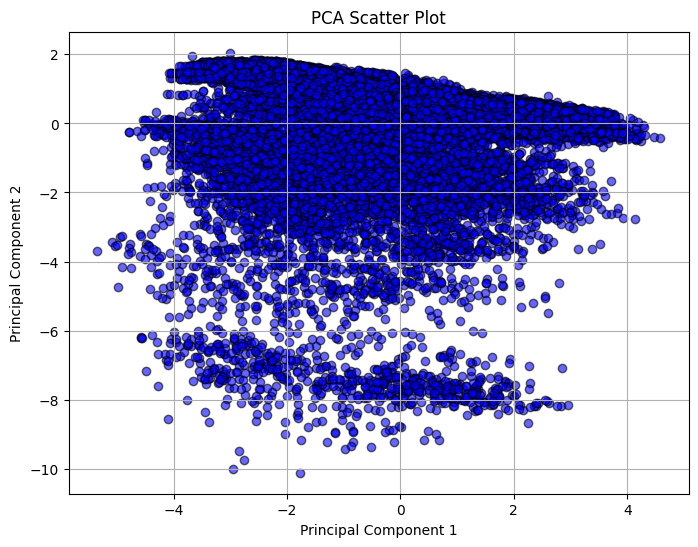

In [301]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.6, c='blue', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.grid(True)
plt.show()

We can now split the data into training and test sets according to the important components and apply the data to the KNN model and test the model and make predictions.

K-Nearest Neighbors (KNN) is a classification algorithm that predicts the category of a new data point by looking at the categories of the K closest points (neighbors) in the dataset. It assigns the most common category among these neighbors to the new point.

In [302]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
#set k values initially to 5
k = 5
#apply define model
knn_model = KNeighborsClassifier(n_neighbors=k)
#apply to the trainig data
knn_model.fit(X_train, y_train)
#make predictions using the test data
y_pred = knn_model.predict(X_test)


Evaluate the model

In [303]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.84      0.88      0.86      7455
        >50K       0.53      0.45      0.49      2314

    accuracy                           0.77      9769
   macro avg       0.68      0.66      0.67      9769
weighted avg       0.76      0.77      0.77      9769

Confusion Matrix:
 [[6533  922]
 [1277 1037]]


**Hyper Paramter Tuning**: We use grid search cross validation method which splits the data into folds and finds the best parameters that can be used to build a model.

Below we use the same process to identify the best parameters to build the KNN.

In [304]:
# Test different values of k and calculate the average accuracy
k_values = range(1, 20)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

# Find the best k value
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best k value: {best_k}")


Best k value: 19


So by performing hyperparameter tuning we obtained the k value as 19. Now, we take k as 19 and evaluate the model. And, we can see that the accuracy has increased.

In [ ]:
k = 19
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

**CONCLUSION**:
<ol>
Logistic regression - 0.79


Decision tree       - 0.79


Random Forest       - 0.82


Gradient Boost      - 0.84


KNN                 - 0.77


KNN after tuning    - 0.79
</ol>

We can see that Gradient boosting classifier is the best model for obvious reasons that it build models on errors to reduce the errors. Random forest is also a good model as it is an ensemble technique which is built using multiple decision trees and best trees are chose using the ranking of eah tree.

Decision trees ad logistic regression are always some easy classification models to begin with as they are simple to understand. PCA and KNN are unsupervised models that help us know the important componants in the data and group similar components.